In [1]:
from pylab import *

# brute_spl-t

This notebook accompanies (and doesn't make sense without) the writeup at http://www.flashingleds.net/brute_SPL-T/brute_spl-t.html

Consider this an appendix or 'supplementary information.

### Surveying the field

Before we get started, it would be helpful to survey the field for some context. There is no official leader board, and game scores are kept local to your device. My sources are people bragging on Twitter or the TouchArcade forums, so this is not an authoritative list but it's a start. As of December 2017, here is the top 20 according to my search:

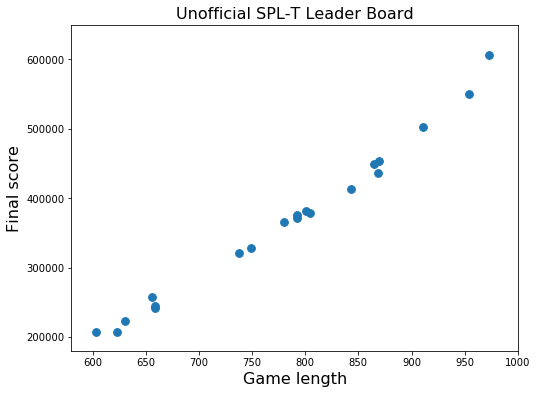

In [4]:
LeaderBoard=[]
LeaderBoard.append((606051,973,'@baronvonholbach')) #Nathan Tompkins
LeaderBoard.append((549368,954,'bamako (toucharcade forums)'))
LeaderBoard.append((502785,911,'@michalboo')) #Michał Buś
LeaderBoard.append((453245,869,'@palevich'))
LeaderBoard.append((436448,868,'@simei89ss'))
LeaderBoard.append((449653,865,'@hzlrbbt'))
LeaderBoard.append((413055,843,'@chriszka'))
LeaderBoard.append((379116,804,'@mangosquash'))
LeaderBoard.append((381621,801,'floplus (toucharcade forums)'))
LeaderBoard.append((371340,792,'@ewr24'))
LeaderBoard.append((376176,792,'@thesymmetrist'))
LeaderBoard.append((365616,780,'Joekis (toucharcade forums)'))
LeaderBoard.append((328173,749,'@Zero101'))
LeaderBoard.append((320674,738,'@addygoldberg'))
LeaderBoard.append((244093,659,'@AnaitGames'))
LeaderBoard.append((241985,659,'@tklber'))
LeaderBoard.append((257846,656,'@RadioSachka'))
LeaderBoard.append((206393,623,'@NightmareJS'))
LeaderBoard.append((222908,630,'@nylander'))
LeaderBoard.append((207247,603,'@GrimSpence'))

LeaderBoard_Score=[]
LeaderBoard_Length=[]
for index,element in enumerate(LeaderBoard):
    LeaderBoard_Score.append(LeaderBoard[index][0])
    LeaderBoard_Length.append(LeaderBoard[index][1])
 
fig=figure(figsize=(8,6))
ax = plt.subplot()

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14) 

ax.scatter(LeaderBoard_Length,LeaderBoard_Score,s=60)

xlabel('Game length', fontsize=16)
ylabel('Final score', fontsize=16)
ylim([1.8e5,6.5e5])
xlim([5.8e2,1e3])
title('Unofficial SPL-T Leader Board', fontsize=16)
show()


## Part 1: Choose moves randomly


If we just pick moves at random, for millions of games, what's the outcome? To run such a simulation, you can execute **playScript01.py**

In [2]:
def LoadDataFiles(dataFiles):
    
    FinalScore=[]
    GameLength=[]
    
    for fileName in dataFiles:
        numGames=0
        with open(fileName) as f:
            next(f)
            for line in f:
                data=line.rstrip('\n').split("\t")
                FinalScore.append(int(data[0]))
                GameLength.append(int(data[1]))
                numGames+=1
            print(numGames,"simulations in file",fileName)
            
    print("\nTotal of",len(FinalScore),"simulations\n")
    print("Approximate compute time",len(FinalScore)/2000000.0,"days")
    maxScore=max(FinalScore)
    minScore=min(FinalScore)
    maxScoreIndex=FinalScore.index(maxScore)
    minScoreIndex=FinalScore.index(minScore)  
    print("Highest score was game #",maxScoreIndex,",",maxScore,"for", GameLength[maxScoreIndex],"moves")
    print("Lowest score was game #",minScoreIndex,",",minScore,"for", GameLength[minScoreIndex],"moves")
    maxLength=max(GameLength)
    minLength=min(GameLength)
    maxLengthIndex=GameLength.index(maxLength)
    print("Longest run was game #",maxLengthIndex,",",FinalScore[maxLengthIndex],"for", maxLength,"moves")
    return FinalScore,GameLength


FinalScore=[]
GameLength=[]

dataFiles=[]
dataFiles.append('data/random_8x16/8x16[a].txt')
dataFiles.append('data/random_8x16/8x16[b].txt')
dataFiles.append('data/random_8x16/8x16[c].txt')
dataFiles.append('data/random_8x16/8x16[d].txt')
dataFiles.append('data/random_8x16/8x16[e].txt')
dataFiles.append('data/random_8x16/8x16[f].txt')
dataFiles.append('data/random_8x16/8x16[g].txt')
dataFiles.append('data/random_8x16/8x16[h].txt')
dataFiles.append('data/random_8x16/8x16[i].txt')
dataFiles.append('data/random_8x16/8x16[j].txt')
dataFiles.append('data/random_8x16/8x16[k].txt')
dataFiles.append('data/random_8x16/8x16[l].txt')
dataFiles.append('data/random_8x16/8x16[m].txt')
FinalScore,GameLength = LoadDataFiles(dataFiles)

3355160 simulations in file data/random_8x16/8x16[a].txt
3311780 simulations in file data/random_8x16/8x16[b].txt
3341020 simulations in file data/random_8x16/8x16[c].txt
3470240 simulations in file data/random_8x16/8x16[d].txt
2520772 simulations in file data/random_8x16/8x16[e].txt
2649062 simulations in file data/random_8x16/8x16[f].txt
3354400 simulations in file data/random_8x16/8x16[g].txt
5325000 simulations in file data/random_8x16/8x16[h].txt
5511000 simulations in file data/random_8x16/8x16[i].txt
5406000 simulations in file data/random_8x16/8x16[j].txt
5382000 simulations in file data/random_8x16/8x16[k].txt
3194200 simulations in file data/random_8x16/8x16[l].txt
2254000 simulations in file data/random_8x16/8x16[m].txt

Total of 49074634 simulations

Approximate compute time 24.537317 days
Highest score was game # 31906075 , 73791 for 367 moves
Lowest score was game # 192 , 19 for 7 moves
Longest run was game # 31906075 , 73791 for 367 moves


**Note: You will probably cause a crash with the cell below if you try to plot all 50 million points in a scatterplot. Try commenting out some of the .append lines in the cell above to cut it down to something more reasonable like 10 million.**

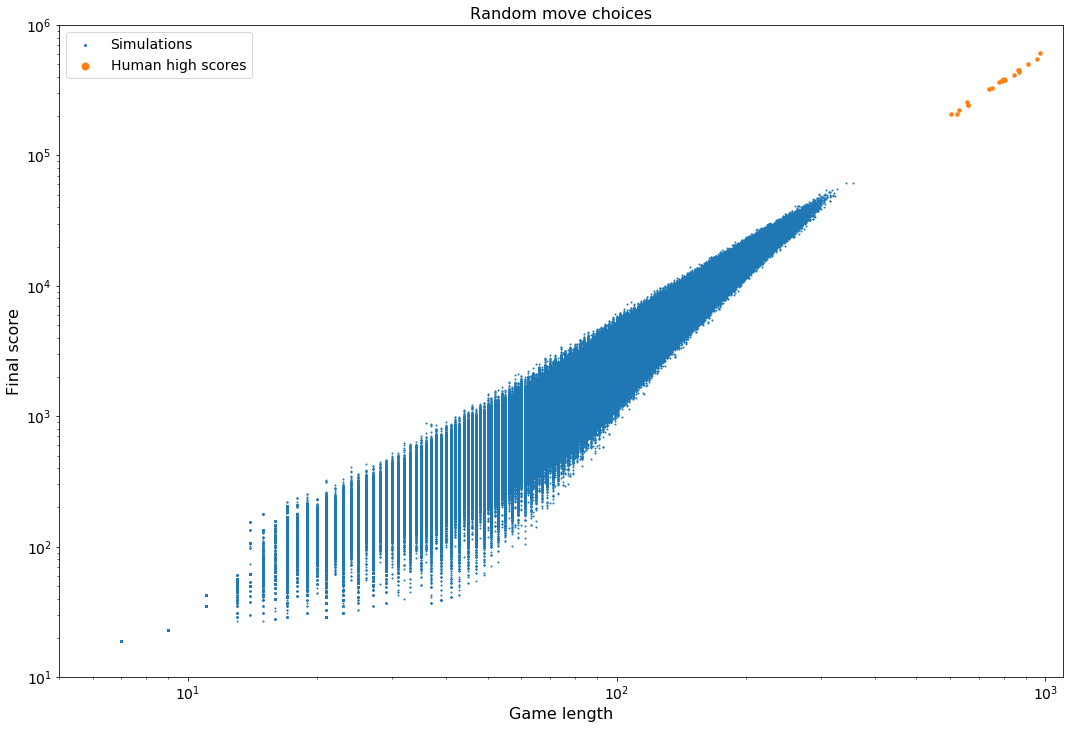

In [7]:
figure(figsize=(18,12))
scatter(GameLength,FinalScore,s=1,label="Simulations")
scatter(LeaderBoard_Length,LeaderBoard_Score,s=12,label="Human high scores")
yscale('log')
xscale('log')
xlabel('Game length', fontsize=16)
ylabel('Final score', fontsize=16)
title('Random move choices', fontsize=16)
legend(fontsize=14,markerscale=2)
ylim([10,1e6])
xlim([5,1.1e3])
show()


The most telling vizualization is a histogram of game lengths:

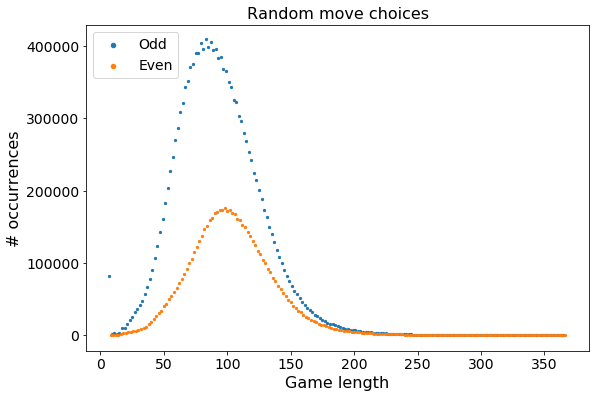

In [5]:
figure()
maxLength=max(GameLength)
minLength=min(GameLength)

histogramInputBinList=[ii-0.5 for ii in range(minLength,maxLength+2)]
histogramPlotBinList=[ii for ii in range(minLength,maxLength+1)]
n, bins, patches=hist(GameLength,bins=histogramInputBinList)
close()
figure(figsize=(9,6))

scatter(histogramPlotBinList[0::2], n[0::2],s=5,label='Odd') #The zeroth element is always 7, so this is odd
scatter(histogramPlotBinList[1::2], n[1::2],s=5,label='Even')   


xlabel('Game length',fontsize=16)
ylabel('# occurrences',fontsize=16)
title('Random move choices', fontsize=16)
legend(loc='upper left',fontsize=14,markerscale=2)
show()

It contains two peaks corresponding to odd and even length games. They're not exactly Gaussian, but a Gaussian fit gives us a reasonable estimate of peak positions and widths:

Even length games:
	Amplitude =  171252.929018
	Mean =  100.047064696
	Standard deviation =  29.3359645939

Odd length games:
	Amplitude =  404806.687441
	Mean =  88.6634407484
	Standard deviation =  30.3163885483


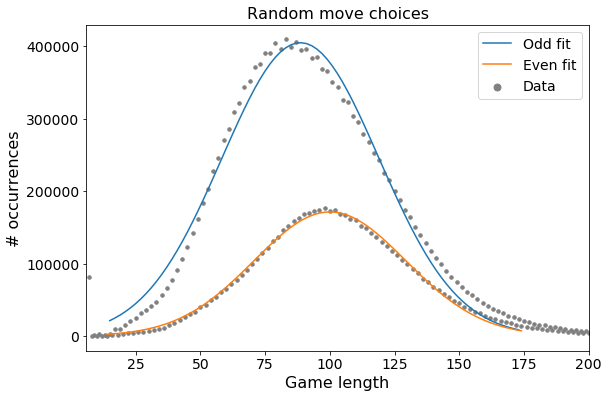

In [32]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

n_even=n[7:168:2]
bins_even=histogramPlotBinList[7:168:2]

n_odd=n[8:168:2]
bins_odd=histogramPlotBinList[8:168:2]

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))


# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1e5, 100., 30.]
coeff, var_matrix = curve_fit(gauss, bins_even, n_even, p0=p0)
hist_fit_even = gauss(bins_even, *coeff)
print('Even length games:')
print('\tAmplitude = ', coeff[0])
print('\tMean = ', coeff[1])
print('\tStandard deviation = ', coeff[2])


p0 = [1e5, 30., 1.]
coeff, var_matrix = curve_fit(gauss, bins_odd, n_odd, p0=p0)
hist_fit_odd = gauss(bins_odd, *coeff)

print('\nOdd length games:')
print('\tAmplitude = ', coeff[0])
print('\tMean = ', coeff[1])
print('\tStandard deviation = ', coeff[2])

figure(figsize=(9,6))
scatter(histogramPlotBinList, n,s=12,label='Data',color='gray')

plot(bins_odd, hist_fit_odd, label='Odd fit')
plot(bins_even, hist_fit_even, label='Even fit')


xlabel('Game length',fontsize=16)
ylabel('# occurrences',fontsize=16)
title('Random move choices', fontsize=16)
legend(loc='upper right',fontsize=14,markerscale=2)
xlim([6,200])
show()


### Aside: Why are there *two* peaks, with different positions and amplitudes?

Since these games are being simulated and we have control of the game rules, we can easily look into this. We can continue to use **playScript01.py**, we simply pass it different board size parameters when calling it. Note that only certain board sizes are 'legal'; if the width or height are not 2^n (n integer) then we will eventually run into a situation where we have an odd-length block, and the 'split in half' operation is then not possible without making fractional blocks

The result of such an experiment is summarized below:

In [2]:
def load_Board_Size_Files(dataFiles):
    
    FinalScore=[]
    GameLength=[]
    
    for fileName in dataFiles:
        numGames=0
        with open(fileName) as f:
            next(f)
            for line in f:
                data=line.rstrip('\n').split("\t")
                FinalScore.append(int(data[0]))
                GameLength.append(int(data[1]))
                numGames+=1

    return FinalScore,GameLength

def make_Board_Size_Histograms():

    n_list=[]
    bins_list=[]
    label_list=[]
    numMeasurements_list=[]
    for v_index,v_size in enumerate([4,8,16,32,64]):
        for h_index,h_size in enumerate([4,8,16,32,64]):
            dataFiles=[]
            boardSizeString="{0}x{1}.txt".format(h_size,v_size)
            label_list.append("{0}x{1}".format(h_size,v_size))

            dataFiles.append('data/boardSizeHorizontalStart/[playScript01a]'+boardSizeString)
            dataFiles.append('data/boardSizeHorizontalStart/[playScript01b]'+boardSizeString)
            dataFiles.append('data/boardSizeHorizontalStart/[playScript01c]'+boardSizeString)
            dataFiles.append('data/boardSizeHorizontalStart/[playScript01d]'+boardSizeString)
            try:
                FinalScore,GameLength = load_Board_Size_Files(dataFiles)
                maxLength=max(GameLength)
                minLength=min(GameLength)
                numMeasurements_list.append(len(FinalScore))

                histogramInputBinList=[ii-0.5 for ii in range(minLength,maxLength+2)]
                histogramPlotBinList=[int(ii) for ii in range(minLength,maxLength+1)]
                figure()
                n, bins, patches=hist(GameLength,bins=histogramInputBinList)
                close()
                n_list.append(n)
                bins_list.append(histogramPlotBinList)

            except:
                print("Error loading,",boardSizeString)
                n_list.append([0])
                numMeasurements_list.append(0)
                bins_list.append([0])
                pass
            
            
    figure(figsize=(24,24))
    for plotIndex in range(25):   
        labelString=label_list[plotIndex]+"\nN="+str(numMeasurements_list[plotIndex])
        ax = plt.subplot(5,5,plotIndex+1)
        bins=bins_list[plotIndex]
        n=n_list[plotIndex]
        
        # Check whether the zeroth element is even
        if bins[0]%2 == 0:
            ax.plot(bins[0::2], n[0::2],label='Even',color='orange')
            ax.plot(bins[1::2], n[1::2],label='Odd',color='blue')
            if max(n[0::2])<max(n[1::2]):
                ax.fill_between(bins[1::2], 0,  n[0::2],color='blue')
                ax.fill_between(bins[0::2], 0,  n[1::2],color='orange')   
            else:
                ax.fill_between(bins[0::2], 0,  n[1::2],color='orange')  
                ax.fill_between(bins[1::2], 0,  n[0::2],color='blue') 

        else:
            ax.plot(bins[1::2], n[1::2],label='Even',color='orange')   
            ax.plot(bins[0::2], n[0::2],label='Odd',color='blue')
            if max(n[0::2])<max(n[1::2]):
                ax.fill_between(bins[1::2], 0,  n[1::2],color='orange')   
                ax.fill_between(bins[0::2], 0,  n[0::2],color='blue') 
            else:
                ax.fill_between(bins[0::2], 0,  n[0::2],color='blue')   
                ax.fill_between(bins[1::2], 0,  n[1::2],color='orange')   
                

        ax.set_title(labelString,fontsize=12)
        if plotIndex>19:
            xlabel('Game length',fontsize=12)
        if plotIndex in [0,5,10,15,20]:
            ylabel('# occurrences',fontsize=12)          
    show()

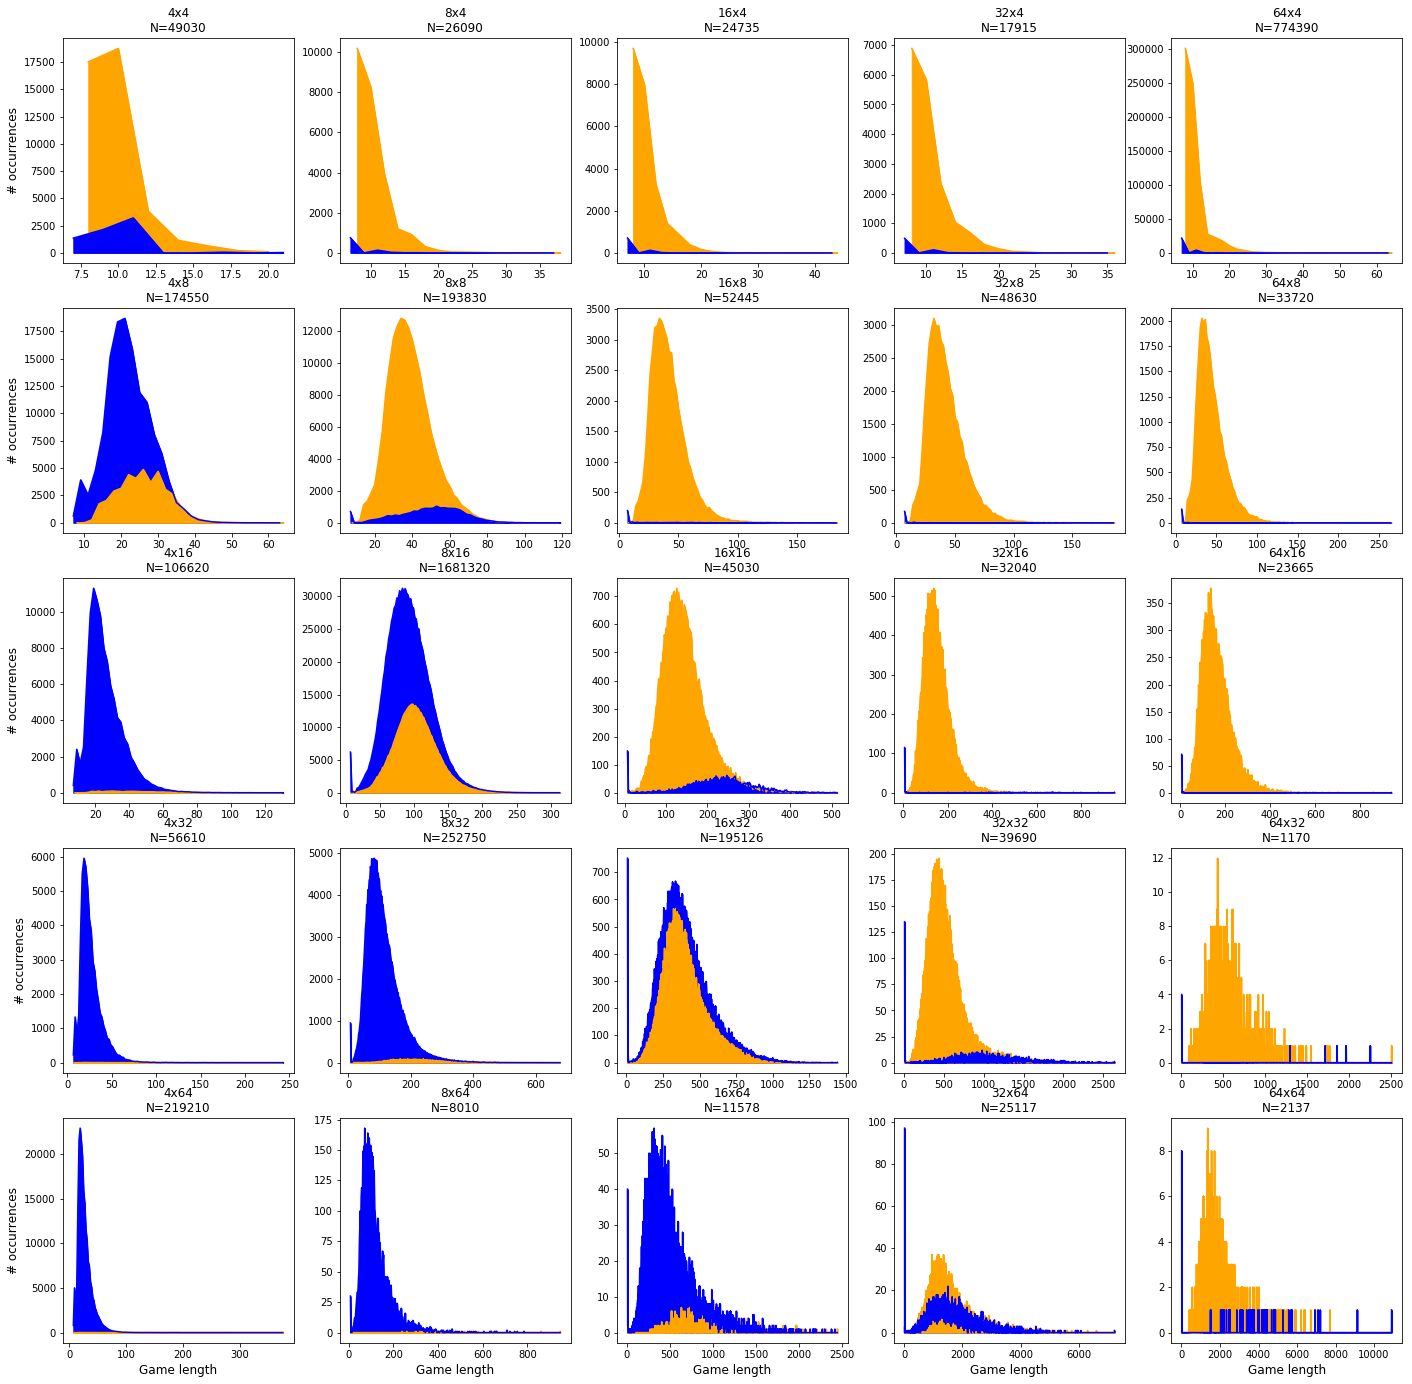

In [3]:
make_Board_Size_Histograms()

** BONUS CONTENT **

You might suspect that if the initial split were vertical rather than horizontal, all these trends would reverse. And you would be correct:

In [4]:
def load_Board_Size_Files(dataFiles):
    
    FinalScore=[]
    GameLength=[]
    
    for fileName in dataFiles:
        numGames=0
        with open(fileName) as f:
            next(f)
            for line in f:
                data=line.rstrip('\n').split("\t")
                FinalScore.append(int(data[0]))
                GameLength.append(int(data[1]))
                numGames+=1

    return FinalScore,GameLength

def make_Board_Size_Histograms():

    n_list=[]
    bins_list=[]
    label_list=[]
    numMeasurements_list=[]
    for v_index,v_size in enumerate([4,8,16,32,64]):
        for h_index,h_size in enumerate([4,8,16,32,64]):
            dataFiles=[]
            boardSizeString="{0}x{1}.txt".format(h_size,v_size)
            label_list.append("{0}x{1}".format(h_size,v_size))

            dataFiles.append('data/boardSizeVerticalStart/[playScript01a]'+boardSizeString)
            dataFiles.append('data/boardSizeVerticalStart/[playScript01b]'+boardSizeString)
            dataFiles.append('data/boardSizeVerticalStart/[playScript01c]'+boardSizeString)
            dataFiles.append('data/boardSizeVerticalStart/[playScript01d]'+boardSizeString)
            try:
                FinalScore,GameLength = load_Board_Size_Files(dataFiles)
                maxLength=max(GameLength)
                minLength=min(GameLength)
                numMeasurements_list.append(len(FinalScore))

                histogramInputBinList=[ii-0.5 for ii in range(minLength,maxLength+2)]
                histogramPlotBinList=[int(ii) for ii in range(minLength,maxLength+1)]
                figure()
                n, bins, patches=hist(GameLength,bins=histogramInputBinList)
                close()
                n_list.append(n)
                bins_list.append(histogramPlotBinList)

            except:
                print("Error loading,",boardSizeString)
                n_list.append([0])
                numMeasurements_list.append(0)
                bins_list.append([0])
                pass
            
            
    figure(figsize=(24,24))
    for plotIndex in range(25):   
        labelString=label_list[plotIndex]+"\nN="+str(numMeasurements_list[plotIndex])
        ax = plt.subplot(5,5,plotIndex+1)
        bins=bins_list[plotIndex]
        n=n_list[plotIndex]
        
        # Check whether the zeroth element is even
        if bins[0]%2 == 0:
            ax.plot(bins[0::2], n[0::2],label='Even',color='orange')
            ax.plot(bins[1::2], n[1::2],label='Odd',color='blue')
            if max(n[0::2])<max(n[1::2]):
                ax.fill_between(bins[1::2], 0,  n[0::2],color='blue')
                ax.fill_between(bins[0::2], 0,  n[1::2],color='orange')   
            else:
                ax.fill_between(bins[0::2], 0,  n[1::2],color='orange')  
                ax.fill_between(bins[1::2], 0,  n[0::2],color='blue') 

        else:
            ax.plot(bins[1::2], n[1::2],label='Even',color='orange')   
            ax.plot(bins[0::2], n[0::2],label='Odd',color='blue')
            if max(n[0::2])<max(n[1::2]):
                ax.fill_between(bins[1::2], 0,  n[1::2],color='orange')   
                ax.fill_between(bins[0::2], 0,  n[0::2],color='blue') 
            else:
                ax.fill_between(bins[0::2], 0,  n[0::2],color='blue')   
                ax.fill_between(bins[1::2], 0,  n[1::2],color='orange')   
                

        ax.set_title(labelString,fontsize=12)
        if plotIndex>19:
            xlabel('Game length',fontsize=12)
        if plotIndex in [0,5,10,15,20]:
            ylabel('# occurrences',fontsize=12)          
    show()

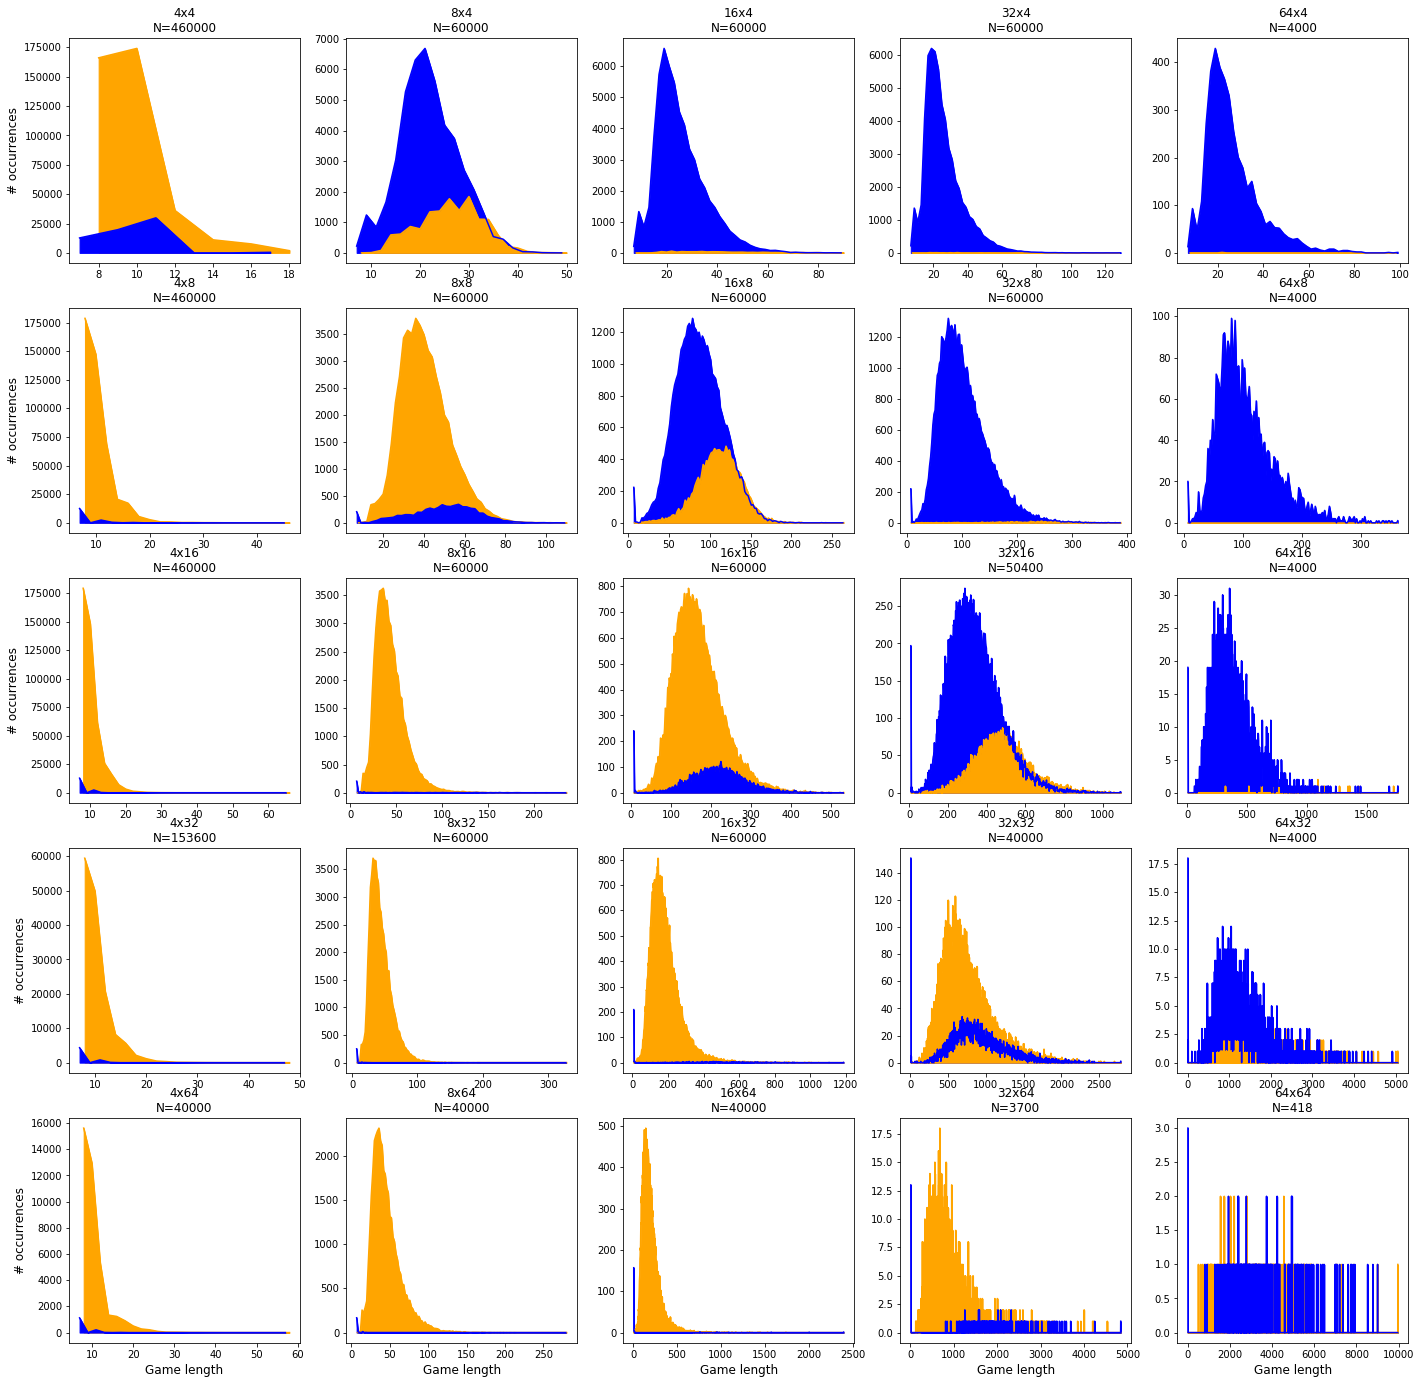

In [5]:
make_Board_Size_Histograms()

# Part 2: Systematically play all possible sequences

To get a feeling for what we are dealing with with the SPL-T game tree, we can play a bunch of games and keep track of the branching factors.

To run such a simulation, you can execute **playScript02.py**, which will play many games randomly and produce a 2D histogram of the branching factor:

Result of 7829310 simulations


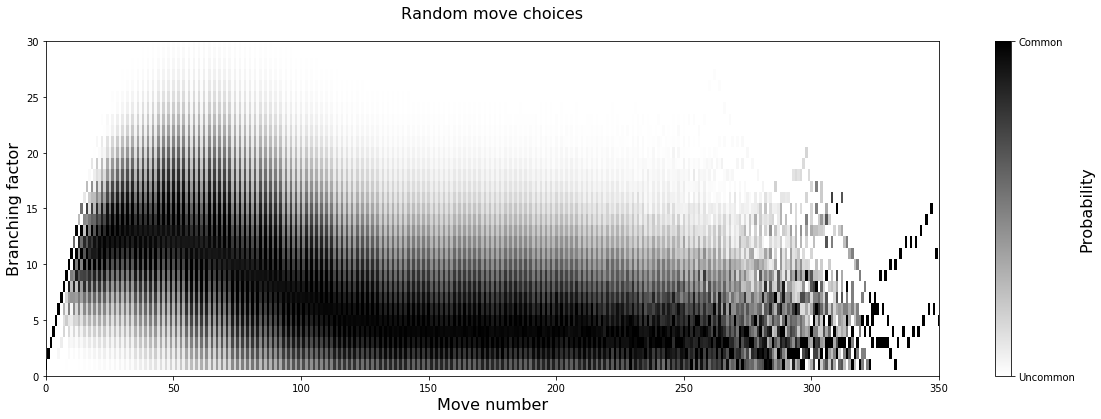

In [2]:
maxNumChoices=50
maxNumMoves=400

numSimulations=0

loadedImage=zeros((maxNumChoices,maxNumMoves))

saveFileNames=[]
saveFileNames.append("data/8x16_choiceImage.dat")

for saveFileName in saveFileNames:
    saveFile=open(saveFileName,'r')
    column=0
    for line in saveFile:
        data=line.rstrip('\n').split("\t")
        for index in range(maxNumChoices):
            loadedImage[index,column]+=int(data[index])
        column+=1
    saveFile.close()

numSimulations=int(loadedImage[1,0])
print("Result of {0} simulations".format(numSimulations))

#-------------------------------
normalizedImage=zeros((maxNumChoices,maxNumMoves))

for moveNumber in range(maxNumMoves):
    imageColumn=[]
    for numChoices in range(maxNumChoices):
        imageColumn.append(loadedImage[numChoices,moveNumber])

    imageColumnSum=0
    for numChoices in range(maxNumChoices):
        if imageColumn[numChoices]>0:
            normalizedImage[numChoices,moveNumber]=imageColumn[numChoices]/(max(imageColumn))
        else:
            normalizedImage[numChoices,moveNumber]=imageColumn[numChoices]

#-------------------------
figure(figsize=(20,6))        
matshow(normalizedImage,aspect='auto',fignum=1,cmap='gray_r')

cbar = colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['Uncommon', 'Common'])  
cbar.set_label('Probability', fontsize=16)

plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
xlabel('Move number',fontsize=16)
ylabel('Branching factor',fontsize=16)

title('Random move choices', fontsize=16)
legend(loc='upper right',fontsize=14,markerscale=2)
ylim([0,30])
xlim([0,350])
show()   


### Symmetry reduction

If during a game we look through the list of available moves and eliminate any which would result in a symmetry duplicate, how much would we reduce the branching factor and hence search space?

For this you can run **playScript04.py**. t repeatedly plays random games, with no memory. Every turn, it tests all the moves it has available (i.e. explores 1 step forward). If any of these 'future' boards are equivalent by symmetry, it flags a redundancy: two of your choices lead to the same outcome.

As output from this script we get a list of how many times a redundancy was found for each turn number, as well as how often that turn number was reached. For example, it might tell us that move #6 was reached in 500 trials, and in those trials a redundant choice was found 32 times.

Real output looks like this:

In [10]:


moveIndex=[]
numVisits=[]
numRedundant=[]

for ii in range(500):
    moveIndex.append(ii)
    numVisits.append(0)
    numRedundant.append(0)

f=open("data/8x16_redundancy_histogram.txt","r")
for index,line in enumerate(f):
    result=line.strip("\n").split("\t")
    numVisits[index]+=int(result[1])
    numRedundant[index]+=int(result[2])
f.close()
    
for index,element in enumerate(numVisits):
    if element==0:
        longestRun=index-1
        break

normalizedRedundancy=[]
for ii in range(len(numVisits)):
    if numVisits[ii]>0:
        normalizedRedundancy.append(numRedundant[ii]/numVisits[ii])
    else:
        normalizedRedundancy.append(NaN)

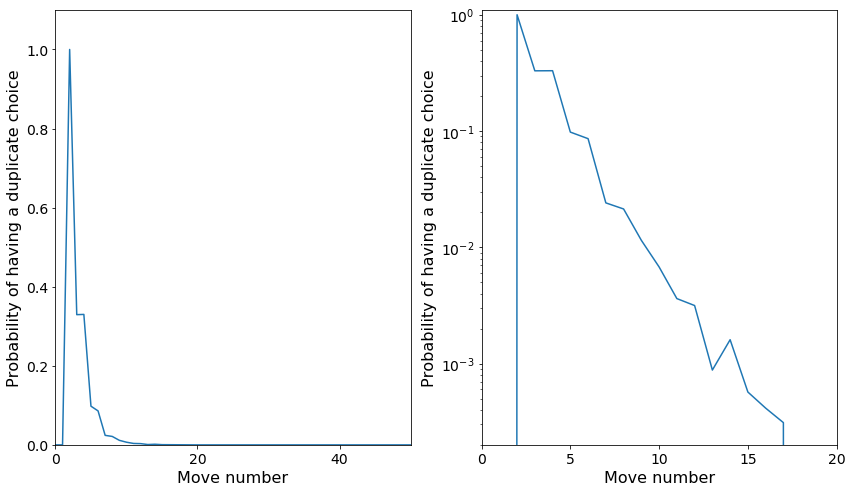

In [11]:
fig=plt.figure(figsize = (14,8))
ax1=fig.add_subplot(121)
ax1.plot(moveIndex,normalizedRedundancy)
plt.ylabel("Probability of having a duplicate choice", fontsize=16)
plt.xlabel("Move number", fontsize=16)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xlim(0,50)

plt.ylim(0.0002,1.1)
plt.locator_params(axis='x',nbins=4)


ax2=fig.add_subplot(122)
ax2.plot(moveIndex,normalizedRedundancy)
plt.ylabel("Probability of having a duplicate choice", fontsize=16)
plt.xlabel("Move number", fontsize=16)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xlim(0,20)

plt.ylim(0.0002,1.1)
ax2.set_yscale('log')
plt.locator_params(axis='x',nbins=4)
plt.show()

# Part 3: Local maxima searches

Here is a typical example of a 12 hour run starting from a fresh board:

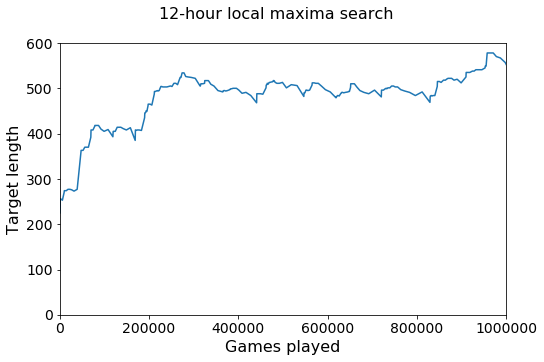

In [12]:
def LoadFile(fileName):
    wave=[]
    with open(fileName) as f:
        for linenumber,line in enumerate(f):
            if linenumber==0:
                waveName=line.rstrip('\n').split("\t")
                for element in waveName:
                    wave.append([])
            else:
                data=line.rstrip('\n').split("\t")
                for index,element in enumerate(data):
                    wave[index].append(int(element))
                    
    return waveName,wave


fig=figure(figsize=(8,5))
fig.suptitle('12-hour local maxima search', fontsize=16)
ax=fig.add_subplot(111)

waveName,wave0 = LoadFile("data/localMaximaDemo/0[meta].txt")
ax.plot(wave0[3],wave0[2])


ylim(0,600)
xlim(0,1e6)
ylabel("Target length", fontsize=16)
xlabel("Games played", fontsize=16
show()

# Conclusions

Lastly: remember that branching ratio image plot in Part 2 which told us that it's around 4? I'll leave you with a beautiful picture: the same type of plot for a 32x64 game board. The branching ratio for the first 1000 moves seems to be more like 100 (!)

Result of 27660 simulations


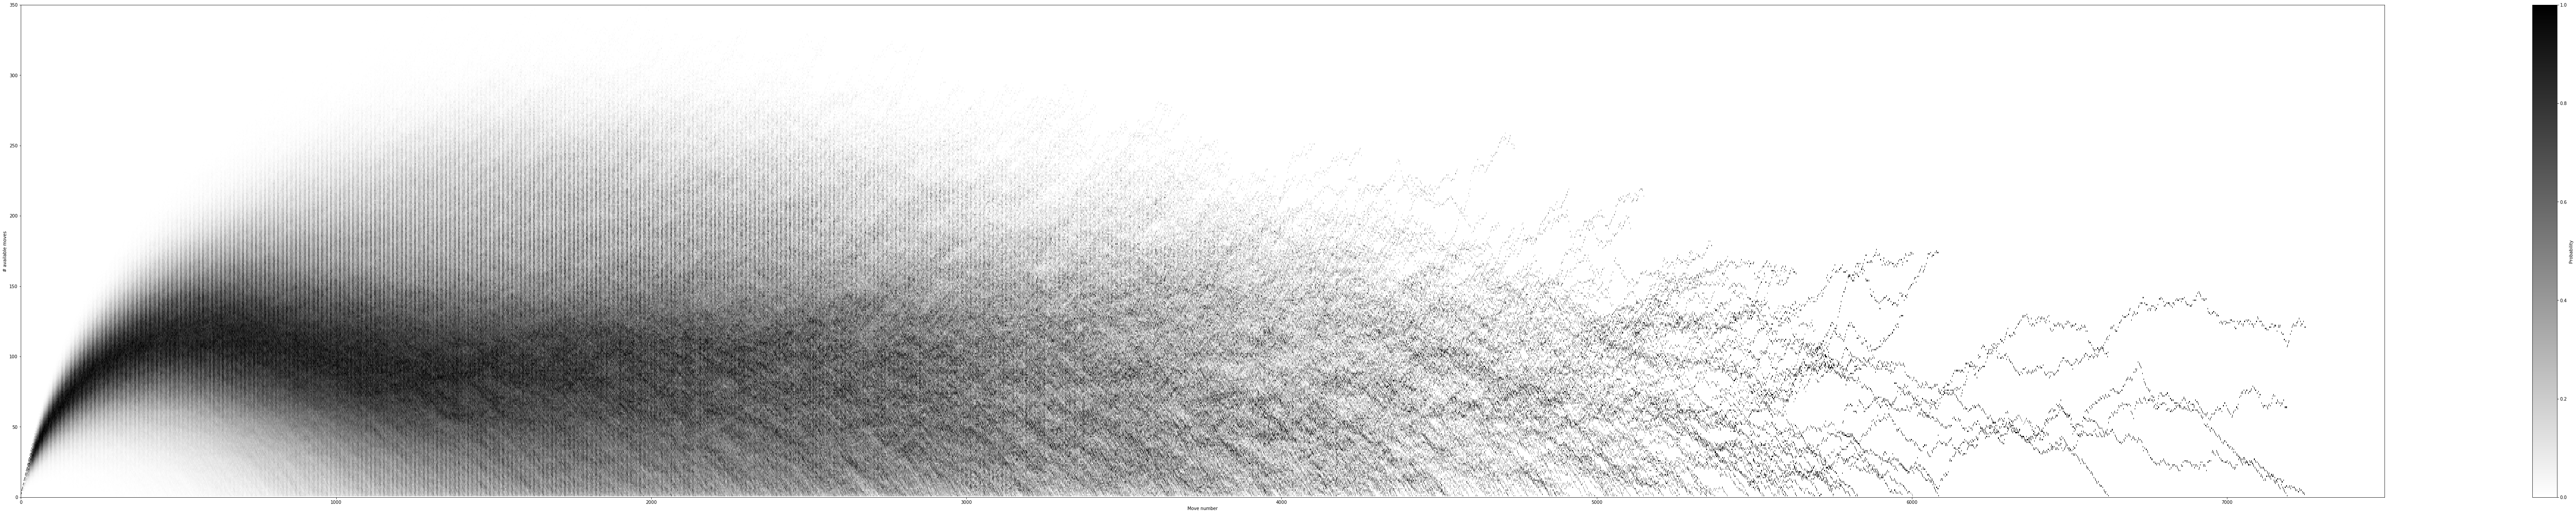

In [3]:
maxNumChoices=400
maxNumMoves=8000

numSimulations=0

loadedImage=zeros((maxNumChoices,maxNumMoves))

saveFile=open("data/32x64_choiceImage.dat",'r')
column=0
for line in saveFile:
    data=line.rstrip('\n').split("\t")
    for index in range(maxNumChoices):
        loadedImage[index,column]+=int(data[index])
    column+=1
saveFile.close()

            
    
numSimulations=int(loadedImage[1,0])
print("Result of {0} simulations".format(numSimulations))

#-------------------------------
normalizedImage=zeros((maxNumChoices,maxNumMoves))

for moveNumber in range(maxNumMoves):
    imageColumn=[]
    for numChoices in range(maxNumChoices):
        imageColumn.append(loadedImage[numChoices,moveNumber])

    for numChoices in range(maxNumChoices):
        if imageColumn[numChoices]>0:
            normalizedImage[numChoices,moveNumber]=imageColumn[numChoices]/(max(imageColumn))
        else:
            normalizedImage[numChoices,moveNumber]=imageColumn[numChoices]

#-------------------------
figure(figsize=(120,20))        
matshow(normalizedImage,aspect='auto',fignum=1,cmap='gray_r')
cbar=colorbar()
cbar.set_label('Probability')
plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
xlabel('Move number')
ylabel('# available moves')
ylim([0,350])
xlim([0,7500])
show()   
